<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/0301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from scipy.stats.distributions import chi_gen

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from sklearn.neural_network import MLPRegressor

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/house_price/train_test.csv",encoding = "cp949")

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.2797


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854648
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084150
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841500
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744150
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
null_sum = pd.DataFrame(df.isnull().sum())

In [ ]:
null_sum

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.drop(columns = ["Alley", "FireplaceQu","PoolQC", "Fence","MiscFeature"])
#총데이터 2919개 중 결측값이 1000개 이상인 columns 삭제 

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,184924.2797


In [ ]:
df["LotFrontage"] = df["LotFrontage"].fillna(method = "ffill")
df["GarageType"] = df["GarageType"].fillna(method = "ffill")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(method = "ffill")
df["GarageFinish"] = df["GarageFinish"].fillna(method = "ffill")
df["GarageQual"] = df["GarageQual"].fillna(method = "ffill")
df["GarageCond"] = df["GarageCond"].fillna(method = "ffill")

In [ ]:
df["LotFrontage"] = df["LotFrontage"].fillna(method = "bfill")
df["GarageType"] = df["GarageType"].fillna(method = "bfill")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(method = "bfill")
df["GarageFinish"] = df["GarageFinish"].fillna(method = "bfill")
df["GarageQual"] = df["GarageQual"].fillna(method = "bfill")
df["GarageCond"] = df["GarageCond"].fillna(method = "bfill")

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df_train = df[df["Id"] < 1461]
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [ ]:
df_test = df[df["Id"] >= 1461]
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.0525
1461,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.3940
1462,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,183583.6836
1463,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,179317.4775
1464,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,150730.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,184924.2797


<AxesSubplot:>

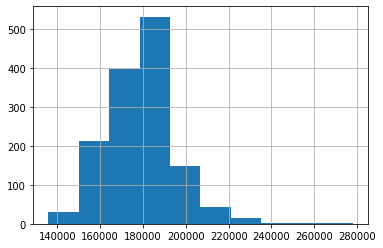

In [ ]:
df_test["SalePrice"].hist()

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [ ]:
numeric_list = [df_train.columns[3], df_train.columns[4], df_train.columns[25], 
                df_train.columns[33], df_train.columns[35], df_train.columns[36], 
                df_train.columns[37], df_train.columns[42], df_train.columns[43], 
                df_train.columns[44], df_train.columns[46], df_train.columns[47], 
                df_train.columns[48], df_train.columns[49], df_train.columns[50], 
                df_train.columns[51], df_train.columns[53], df_train.columns[55], 
                df_train.columns[59], df_train.columns[60], df_train.columns[64], 
                df_train.columns[65], df_train.columns[66], df_train.columns[67], 
                df_train.columns[68], df_train.columns[69], df_train.columns[70],
                df_train.columns[71]]

In [ ]:
len(numeric_list)

28

In [ ]:
categori_df = df_train.drop(numeric_list, axis = 1)

In [ ]:
categori_df

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,2003.0,RFn,TA,TA,Y,2008,WD,Normal,208500.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,1976.0,RFn,TA,TA,Y,2007,WD,Normal,181500.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,2001.0,RFn,TA,TA,Y,2008,WD,Normal,223500.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,1998.0,Unf,TA,TA,Y,2006,WD,Abnorml,140000.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,2000.0,RFn,TA,TA,Y,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,1999.0,RFn,TA,TA,Y,2007,WD,Normal,175000.0
1456,1457,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,1978.0,Unf,TA,TA,Y,2010,WD,Normal,210000.0
1457,1458,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,1941.0,RFn,TA,TA,Y,2010,WD,Normal,266500.0
1458,1459,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,1950.0,Unf,TA,TA,Y,2010,WD,Normal,142125.0


In [ ]:
categori_df = categori_df.drop(["SalePrice"], axis = 1)
#이전에 ["Id"]도제거.

In [ ]:
categori_df = categori_df.drop(["Id"], axis = 1)


In [ ]:
categori_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
cg_list = categori_df.columns

In [ ]:
len(cg_list)

46

In [ ]:
print(type(numeric_list))

<class 'list'>


In [ ]:
print(type(cg_list))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
cg_list = list(cg_list)

In [ ]:
X = df_train[numeric_list+cg_list]

In [ ]:
Y = df_train["SalePrice"]

In [ ]:
ct = ColumnTransformer([("scaling", StandardScaler(), numeric_list), 
                        ("onehot", OneHotEncoder(sparse = False), cg_list)])

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['LotFrontage', 'LotArea', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'BsmtFullBath',
                                  'BsmtHalfBath', 'FullBath', 'HalfBath',
                                  'BedroomAbvGr', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                                  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',...
                                  'LotShape', 'LandContour', 'Utilities',
                                  'LotConfig', 'LandSlope', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'OverallQual', 'OverallCond',
                                  'YearBuilt', 'Ye

In [ ]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/before house

/content/drive/MyDrive/Colab Notebooks/before house


In [ ]:
!ls

'01_04(2).ipynb'			 sample_submission.csv
'0109(easy version).ipynb'		'script(test) (1).ipynb'
'0116(보완3).ipynb'			'script(test) (2).ipynb'
 0227.ipynb				'script(test).ipynb'
 busan_cafeteria2.ipynb			 test.csv
 busan_cafeteria.ipynb			'test_number_3 (1).ipynb'
 class2.ipynb				 test_number_3.ipynb
 class3.ipynb				 train.csv
'class(Linear).ipynb'			 tree.dot
'class(text_numeric).ipynb'		 Untitled
 county_census_and_election_result.csv	 USA_election_predict.ipynb
 HousePrice2.ipynb			'visaulization(review).ipynb'
'House Prices.ipynb'			'시각화(0207).ipynb'
 ready_test.ipynb


In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


In [ ]:
import import_ipynb

In [ ]:
import class2

importing Jupyter notebook from class2.ipynb


In [ ]:
x = class2.numeric()

In [ ]:
x.train_test_data = [X_train, X_test, Y_train,Y_test]

In [ ]:
x.df = df_train

----------LinearRegression value-----------
predict value
 [ 85738.53810038 121767.39722377 198272.24777769 233484.58230698
 162758.05262357 205869.45202209 330571.9605267  212683.25562321
  -4880.47271702 182406.56524053 211993.67379168  99455.92844021
 151792.56599708 134044.04126221 391601.25652741 146494.11732226
 221901.0791872  178638.39736603  73824.49840739 238106.91939861
 159193.63290935 201488.15153112 162870.08619989  94086.5233236
 123087.20475574 339956.03410374 216938.49188716 123066.3134209
 232382.54190703  82249.88197348 138793.14134656 112977.84320088
 121915.37112508  65711.94955662 211098.10742347 241193.03157824
 134372.94388397 190624.45006118 171413.93241348 206213.88529602
  82684.27814567 234361.67589827 342577.54929161  92520.55712525
 244532.2796629  141827.91724541 131803.97618289 133455.74930356
 277221.94940249 206203.89577862 303907.14879294 121912.84054447
 126833.72652009 304015.16401055 370560.0053255  226186.3112222
 183468.56120661 102758.05309069 1

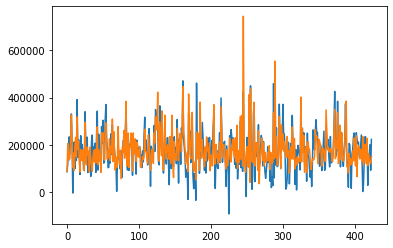

In [ ]:
x.linearRegress(x.train_test_data, x.df.columns)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

[ridge]
ridge R2 : 0.979
RMSE : 34901.471
절편 100928.78
가중치(beta) [-5149.139  6236.195  5582.692 ... -1321.478 -4554.792 -7705.742]
----------- plot grow----------- 


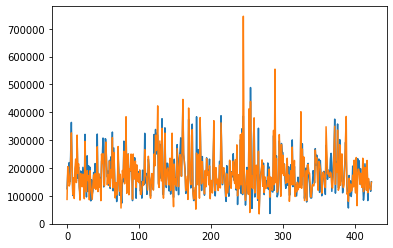

In [ ]:
x.Ridge_function(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

[lasso]
lasso R2 : 1.000
RMSE : 61901.032
절편 -33378.813
가중치(beta) [ 2717.571 10094.204 16672.236 ... 16728.503  -410.013    -0.   ]
----------- plot grow----------- 


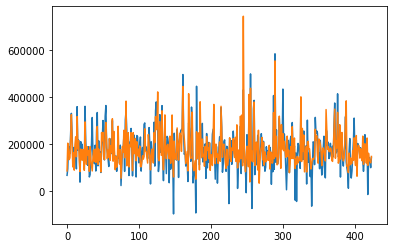

In [ ]:
x.Lasso_function(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+09, tolerance: 6.329e+08
  model = cd_fast.enet_coordinate_descent(


[elastic]
ela R2 : 0.944
RMSE : 32830.301
절편 141564.511
가중치(beta) [-4866.359  5566.427  5817.412 ... -1484.128 -2551.419 -1584.56 ]
----------- plot grow----------- 


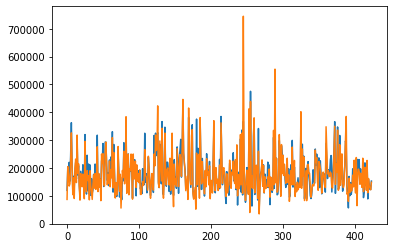

In [ ]:
x.Elastic_function(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

[knn neighbors]
accuracy: 0.810
RMSE: 36632.219
----------- plot grow----------- 


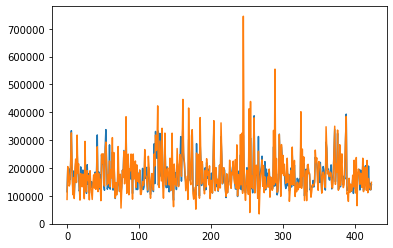

In [ ]:
x.knn_reg_function(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

[SVM : Support Vector Machine]
accuracy : 0.040
RMSE : 74847.384
[[207.85875435 191.31478416 285.18836145 ...  -3.         -25.
   60.        ]]
----------- plot grow----------- 


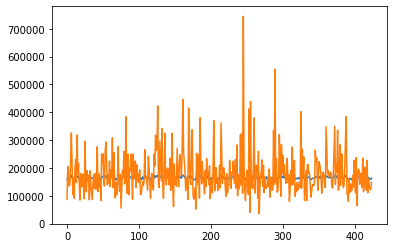

In [ ]:
x.SVR_function(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

accuracy : 0.000
rmse :  77398.583
[ 3.42771699e-06  3.57045826e-06  6.03710653e-06 ... -4.74019815e-08
 -6.91446008e-07  1.16548211e-06]
----------- plot grow----------- 


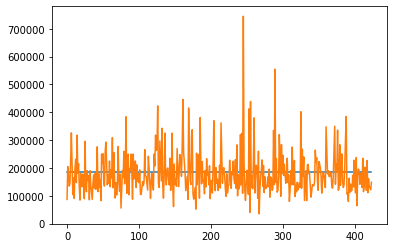

In [ ]:
x.NaiveBayes(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Y predict value : 
 [118340.84585051 177836.84225664 177126.29134261 228310.71140215
 154293.48611672 255477.48001758 369520.24371713 214124.89122658
 101569.85715782 156584.7481382  119487.3458827  189275.32085743
 213495.0306528  168796.45716147 285660.45431077 161230.8668615
 223672.49116094 136241.84498638 107003.70146503 190021.02691598
 159045.65944727 155233.99840298 202801.02890351 175819.68712939
 118460.98553086 333864.6044787  152965.98515714  98512.71285289
 233821.50809944 110169.3138282  224111.99799402  70101.32840609
 202753.48846913 122904.45972655 164068.46956139 123418.13396103
 136672.5539597  182839.55322767 128930.09968901 210141.21382166
 115724.3125796  148647.98388088 317218.73049427 121159.5488802
 175607.59654907 118592.05410299 155364.69431169 122907.69410745
 211777.24225359 243466.42934819 300384.25582723 130541.12018645
 151544.84534908 320560.5300506  282973.63296012 209985.42687134
 178631.96290588 186347.33030503 129805.68721909 211747.1083531
 122586.

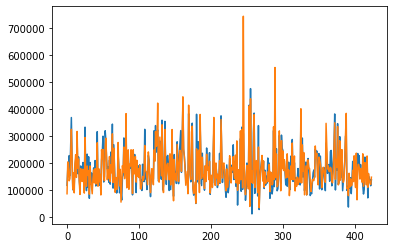

In [ ]:
x.MLP(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

In [ ]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(x.Y_value[0],x.Y_test)
corr

(array([0.8738588182175977], dtype=object), 2.9891839603097946e-134)

In [ ]:
x.DNN(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
#x10.plot_picture(x10.Y_value[0],x10.Y_test)

Y predict value 
 [[0.    0.    0.081 0.    0.    0.    0.    0.083 0.    0.    0.    0.055
  0.    0.    0.    0.    0.141 0.    0.066 0.    0.279 0.058 0.065 0.
  0.071 0.062 0.    0.    0.    0.002 0.    0.    0.056 0.    0.    0.206
  0.036 0.    0.019 0.    0.    0.    0.114 0.155 0.104 0.057 0.    0.047
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.028 0.1   0.
  0.    0.093 0.    0.068]
 [0.172 0.    0.098 0.026 0.17  0.    0.    0.    0.105 0.    0.    0.099
  0.039 0.    0.165 0.    0.135 0.    0.    0.191 0.064 0.138 0.078 0.
  0.    0.166 0.    0.    0.    0.06  0.    0.    0.106 0.    0.    0.119
  0.    0.    0.047 0.    0.161 0.077 0.01  0.059 0.121 0.    0.    0.061
  0.027 0.    0.    0.    0.    0.044 0.    0.015 0.    0.14  0.026 0.001
  0.    0.122 0.    0.012]
 [0.036 0.    0.    0.004 0.17  0.    0.    0.    0.    0.    0.    0.031
  0.    0.    0.    0.    0.227 0.066 0.    0.079 0.172 0.12  0.139 0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.

Y predict value : 
 [129277.66936368 186373.00409004 198716.33373157 170723.72463261
 157895.86530218 194568.55398699 334279.23062943 204450.90598609
 138766.48934835 163105.95771123 106173.24253419 189435.2734688
 247596.6228794  172127.37711302 297812.38538352 202927.36863234
 234059.5473484  130501.2993964  137410.27374429 204022.17457967
 148598.94768151 147784.93980965 209649.36696806 141903.43855814
 140360.69742251 307725.47774726 169887.4880949  119682.95181612
 218708.25436449 137367.3523066  195302.62346483 116818.01247392
 202585.88566723 164826.95950958 174134.17007824 176969.07165867
 136957.50732943 174152.63530457 161462.95159809 210499.73399411
 132561.93812847 174548.37858665 329374.79096876 143233.41624714
 192506.6714225  135092.27020988 153124.01268491 144497.07891644
 259816.14758091 211608.0271931  254489.05640562 137966.76877384
 165700.85402464 233266.30025583 276960.7441053  206021.27672049
 145797.11153383 144488.35230684 136974.77964687 273499.20220575
 12785

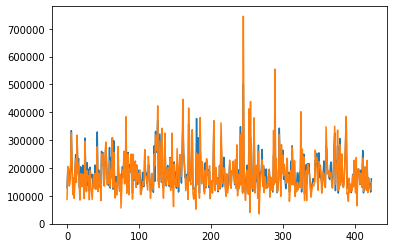

In [ ]:
x.RandomForest(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

Y predict value : 
 [ 90045.13235587 199507.40166709 180030.92662933 204297.72875898
 161335.91694674 205621.54119363 359550.68475745 184250.81932092
 111070.34536161 172281.25539568 115407.63580445 192864.5867737
 223268.55126592 164749.73405139 288044.74924293 200894.25524775
 237086.47661909 132626.69433763 133906.82086136 199097.21825613
 147111.04240844 139878.92855946 186832.56375616 140668.2639289
 127312.42519463 313612.51623564 146722.80481712 104773.88294737
 219517.05175552 138631.17102039 202710.10405097  91156.21396059
 222534.64185913 140543.03053561 165871.97544347 128874.82713659
 140364.63451762 168680.65468443 147585.96207547 196958.93675977
 126912.23846064 178250.41315206 354837.17231892 132784.23821129
 178854.17570196 136568.72927743 159580.91784424 105406.69000886
 259852.85643286 206913.73841799 268723.62899504 139217.06109005
 128131.91496732 249440.08620888 294095.57829173 204532.62430842
 144976.31312429 163101.58979439 141068.25665621 247264.10295072
 129190

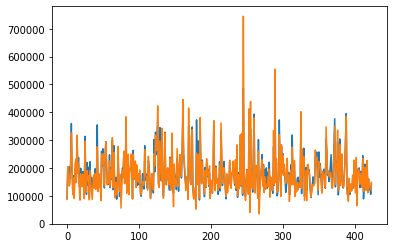

In [ ]:
x.Gradien(x.train_test_data)
x.Reset_index(x.Y_value[1],1)
x.plot_picture(x.Y_value[0],x.Y_test)

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.0525
1461,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.3940
1462,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,183583.6836
1463,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,179317.4775
1464,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,150730.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,184924.2797


In [ ]:
X2_test = df_test[numeric_list+cg_list]

In [ ]:
  X2_test

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Functional,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,YrSold,SaleType,SaleCondition
1460,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,...,Typ,Attchd,1961.0,Unf,TA,TA,Y,2010,WD,Normal
1461,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,...,Typ,Attchd,1958.0,Unf,TA,TA,Y,2010,WD,Normal
1462,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,...,Typ,Attchd,1997.0,Fin,TA,TA,Y,2010,WD,Normal
1463,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,...,Typ,Attchd,1998.0,Fin,TA,TA,Y,2010,WD,Normal
1464,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,...,Typ,Attchd,1992.0,RFn,TA,TA,Y,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,0.0,0.0,0.0,546.0,546.0,546,546,0,...,Typ,CarPort,1970.0,Unf,TA,TA,Y,2006,WD,Normal
2915,21.0,1894,0.0,252.0,0.0,294.0,546.0,546,546,0,...,Typ,CarPort,1970.0,Unf,TA,TA,Y,2006,WD,Abnorml
2916,160.0,20000,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,...,Typ,Detchd,1960.0,Unf,TA,TA,Y,2006,WD,Abnorml
2917,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,...,Typ,Detchd,1960.0,Unf,TA,TA,Y,2006,WD,Normal


In [ ]:
X2_test = ct.transform(X2_test)

ValueError: ignored

In [ ]:
Y2_test = df_test["SalePrice"]

In [ ]:
Y2_test

In [ ]:
X2_test